In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_Train = pd.read_csv('Train.csv')

In [6]:
df_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df_Test = pd.read_csv('Test.csv')

In [8]:
df_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
df_Train.shape

(8523, 12)

In [10]:
# Exploratory data analysis (EDA)

In [11]:
# Null vlaue check

In [12]:
df_Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
# We have null values in same column for both test and train data

In [15]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df_Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
# Now for Item_Weight col let's fill null values with mean of the data

In [18]:
df_Train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [19]:
df_Train['Item_Weight'].fillna(df_Train['Item_Weight'].mean(), inplace=True)
df_Test['Item_Weight'].fillna(df_Test['Item_Weight'].mean(), inplace=True)

In [20]:
df_Train['Item_Weight'].isnull().sum()

0

In [21]:
df_Train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [22]:
# So as Outlet_SIze is categorical variable will use Mode imputation.

In [23]:
df_Train['Outlet_Size'].fillna(df_Train['Outlet_Size'].mode()[0], inplace=True)
df_Test['Outlet_Size'].fillna(df_Test['Outlet_Size'].mode()[0], inplace=True)

In [24]:
# Now we have removed all null values.
print("Null values in train data: ",df_Train.isnull().sum())
print("Null values in test data: ", df_Test.isnull().sum())

Null values in train data:  Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Null values in test data:  Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [25]:
# Feature selection process:
# Selecting features based on requirements

In [26]:
# As we don't required Item_Identifier and Outlet_Identifier as it's just serial number, so will drop these both columns.

In [27]:
df_Train.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df_Test.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [28]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


C:\Users\sumed\AppData\Local\Temp\ipykernel_20376\1179207064.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
C:\Users\sumed\AppData\Local\Temp\ipykernel_20376\1179207064.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
C:\Users\sumed\AppData\Local\Temp\ipykernel_20376\1179207064.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
C:\Users\sume

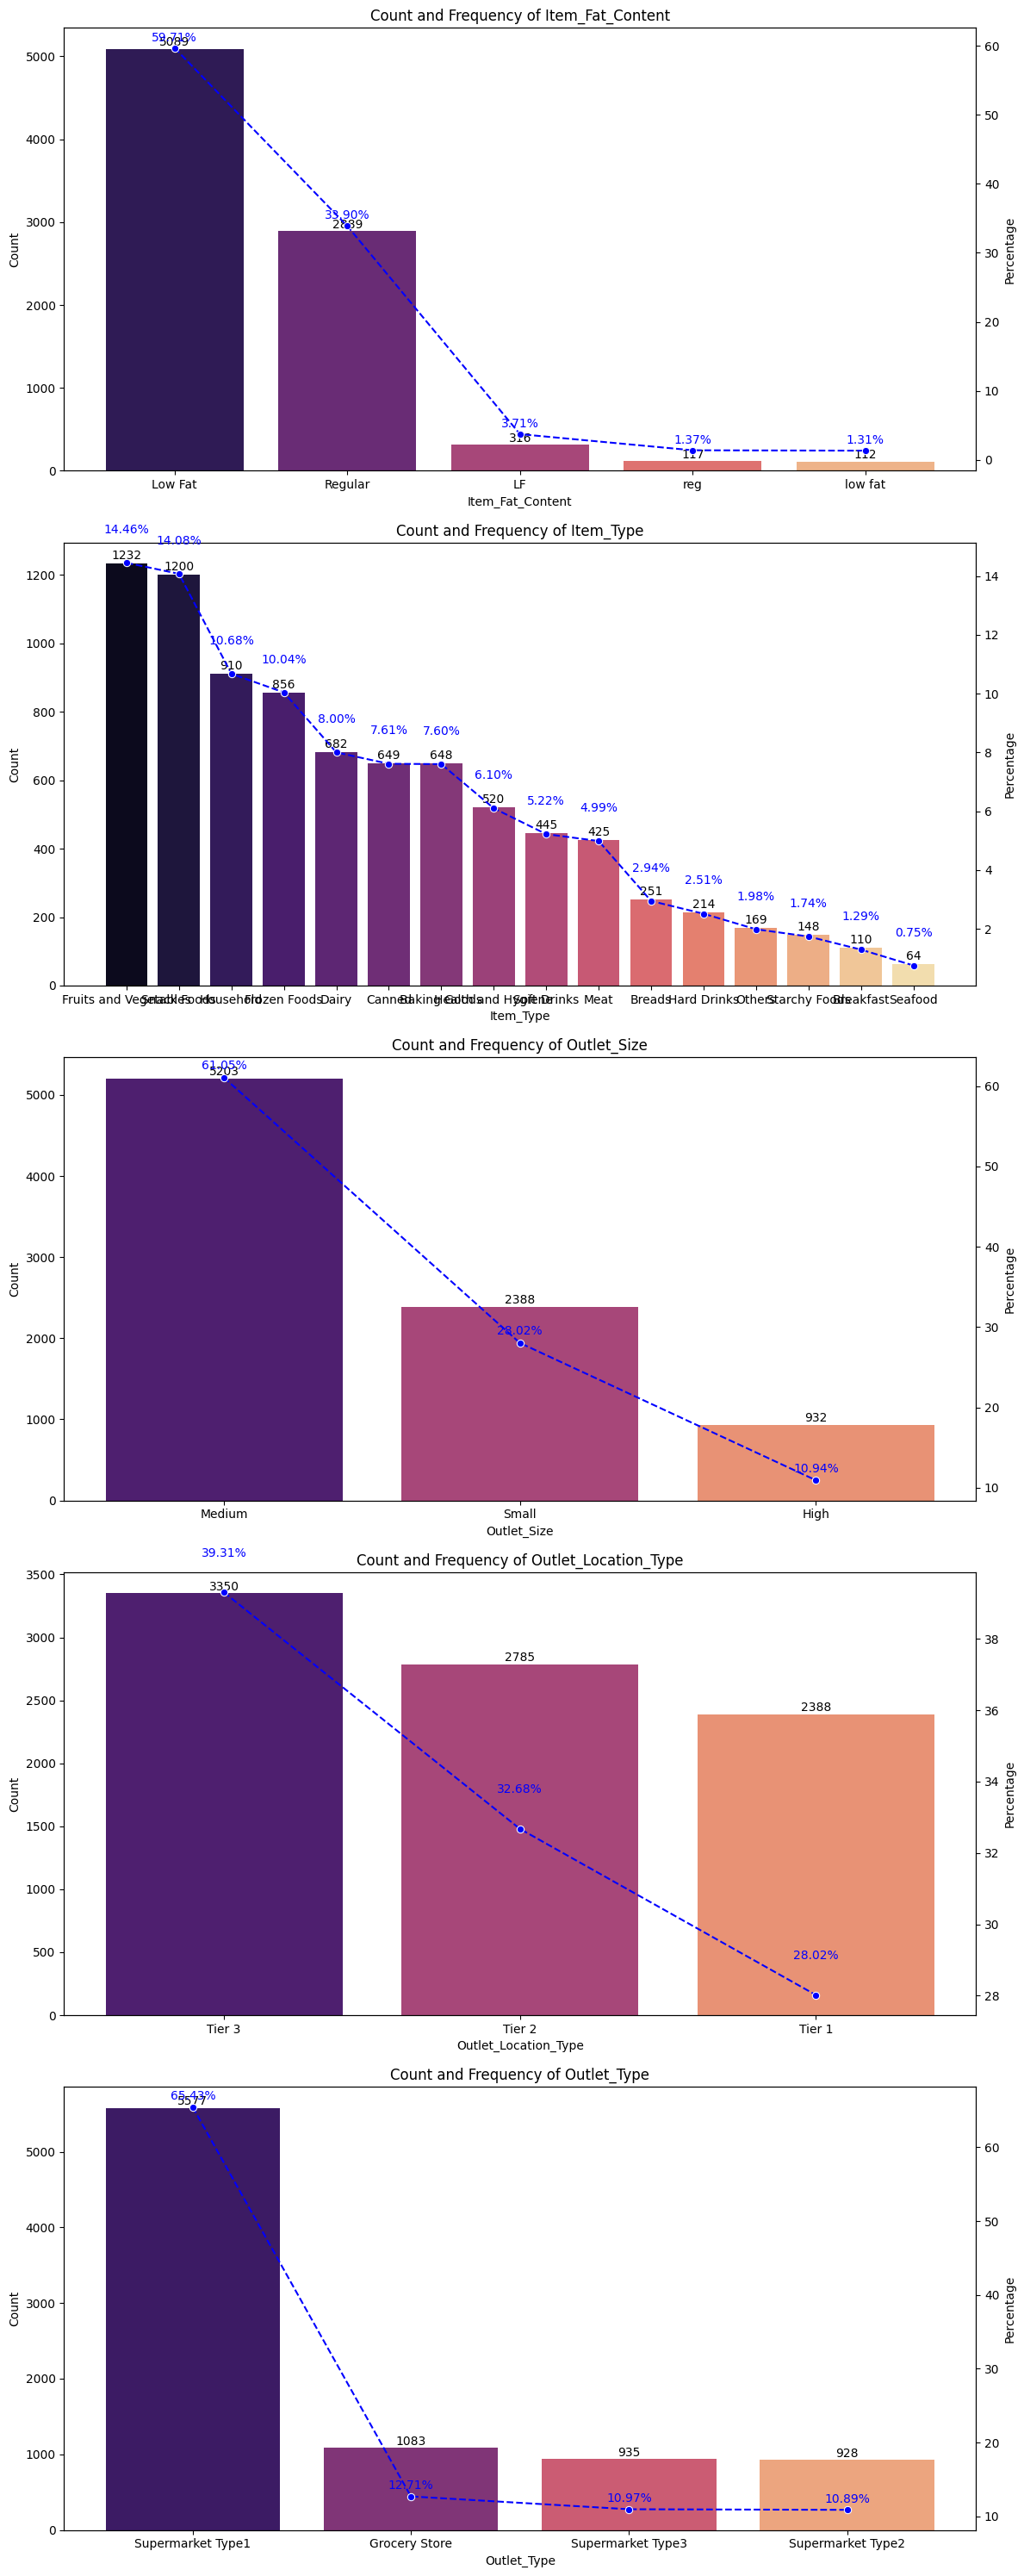

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Define a FacetGrid with each categorical feature as a separate plot
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 30))

# Loop through each categorical column to create FacetGrid plots
for i, col in enumerate(categorical_cols):
    # Get counts and calculate frequencies
    count_data = df_Train[col].value_counts().reset_index()
    count_data.columns = [col, 'Count']
    count_data['Percentage'] = (count_data['Count'] / count_data['Count'].sum()) * 100

    # Plot count and percentage on dual y-axes
    sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
    ax2 = axes[i].twinx()
    sns.lineplot(x=col, y='Percentage', data=count_data, marker='o', color='b', ax=ax2, linestyle='--')

    # Set titles and labels
    axes[i].set_title(f'Count and Frequency of {col}')
    axes[i].set_ylabel('Count')
    ax2.set_ylabel('Percentage')

    # Annotate counts on bar plot
    for j in range(count_data.shape[0]):
        axes[i].text(j, count_data['Count'][j] + 5, f'{count_data["Count"][j]}', ha='center', va='bottom')
        ax2.text(j, count_data['Percentage'][j] + 1, f'{count_data["Percentage"][j]:.2f}%', ha='center', color='blue')

plt.tight_layout()
plt.show()


In [30]:
# Now let's use pandas profilling

In [31]:
import sweetviz as sv

In [32]:
report = sv.analyze(df_Train)
report.show_html('report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
import webbrowser

# Replace 'report.html' with the actual path if it’s in a different folder
webbrowser.open('report.html')

True

In [38]:
import plotly.express as px
# Create a long-form DataFrame with only numeric columns for easier plotting
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
df_long = df_Train.melt(value_vars=numeric_columns, var_name="Feature", value_name="Value")

# Interactive box plot with facets
fig = px.box(df_long, x="Feature", y="Value", points="all", title="Outliers in Numeric Columns")
fig.show()


In [40]:
import plotly.graph_objects as go

# Set threshold values for demonstration purposes
threshold_sales = 7000  # Set a threshold for 'Item_Outlet_Sales'

# Highlight outliers in 'Item_Outlet_Sales'
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Train['Item_Visibility'], y=df_Train['Item_Outlet_Sales'],
                         mode='markers', marker=dict(color='blue'), name='Normal Points'))
fig.add_trace(go.Scatter(x=df_Train[df_Train['Item_Outlet_Sales'] > threshold_sales]['Item_Visibility'],
                         y=df_Train[df_Train['Item_Outlet_Sales'] > threshold_sales]['Item_Outlet_Sales'],
                         mode='markers', marker=dict(color='red', size=10), name='Outliers'))

fig.update_layout(title="Interactive Scatter Plot with Outliers Highlighted",
                  xaxis_title="Item Visibility", yaxis_title="Item Outlet Sales")
fig.show()


In [41]:
# Annotated Heatmap with Detailed Hover Information

In [43]:
# Select only the numeric columns from the DataFrame
numeric_df = df_Train.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix for only the numeric columns
correlation_matrix = numeric_df.corr()

# Create the interactive heatmap with annotations
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    hoverongaps=False,
    zmin=-1, zmax=1,  # Set the range for correlations
    colorbar=dict(title="Correlation"),
    text=correlation_matrix.values.round(2),
    texttemplate="%{text}"  # Show values in each cell
))

fig.update_layout(
    title="Interactive Correlation Heatmap with Annotations",
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis_nticks=36
)
fig.show()
